In [2]:
import numpy as np
import re
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
from math import factorial as f
from sklearn. linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB,BernoulliNB,MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report


from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from matplotlib.font_manager import FontProperties
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor,StackingRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
import pandas as pd



In [3]:
df=pd.read_csv("C://project11//bank_loan_defaulter.csv")

df.info

In [4]:
df.info

<bound method DataFrame.info of              ID  Loan Amount  Funded Amount  Funded Amount Investor  Term  \
0      65087372        10000          32236             12329.36286    59   
1       1450153         3609          11940             12191.99692    59   
2       1969101        28276           9311             21603.22455    59   
3       6651430        11170           6954             17877.15585    59   
4      14354669        16890          13226             13539.92667    59   
...         ...          ...            ...                     ...   ...   
67458  16164945        13601           6848             13175.28583    59   
67459  35182714         8323          11046             15637.46301    59   
67460  16435904        15897          32921             12329.45775    59   
67461   5300325        16567           4975             21353.68465    59   
67462  65443173        15353          29875             14207.44860    59   

      Batch Enrolled  Interest Rate Grade S

In [5]:
df.shape

(67463, 35)

In [6]:
df.describe().transpose

<bound method DataFrame.transpose of                  ID   Loan Amount  Funded Amount  Funded Amount Investor  \
count  6.746300e+04  67463.000000   67463.000000            67463.000000   
mean   2.562761e+07  16848.902776   15770.599114            14621.799323   
std    2.109155e+07   8367.865726    8150.992662             6785.345170   
min    1.297933e+06   1014.000000    1014.000000             1114.590204   
25%    6.570288e+06  10012.000000    9266.500000             9831.684984   
50%    1.791565e+07  16073.000000   13042.000000            12793.682170   
75%    4.271521e+07  22106.000000   21793.000000            17807.594120   
max    7.224578e+07  35000.000000   34999.000000            34999.746430   

               Term  Interest Rate  Home Ownership  Debit to Income  \
count  67463.000000   67463.000000    67463.000000     67463.000000   
mean      58.173814      11.846258    80541.502522        23.299241   
std        3.327441       3.718629    45029.120366         8.4518

In [7]:
df.describe

<bound method NDFrame.describe of              ID  Loan Amount  Funded Amount  Funded Amount Investor  Term  \
0      65087372        10000          32236             12329.36286    59   
1       1450153         3609          11940             12191.99692    59   
2       1969101        28276           9311             21603.22455    59   
3       6651430        11170           6954             17877.15585    59   
4      14354669        16890          13226             13539.92667    59   
...         ...          ...            ...                     ...   ...   
67458  16164945        13601           6848             13175.28583    59   
67459  35182714         8323          11046             15637.46301    59   
67460  16435904        15897          32921             12329.45775    59   
67461   5300325        16567           4975             21353.68465    59   
67462  65443173        15353          29875             14207.44860    59   

      Batch Enrolled  Interest Rate Grade

In [8]:
#	Check if there are any duplicate records in the dataset? if any drop them, and check the percentage of missing values, if any? treat them with appropriate methods.
#	Check summary statistics of the dataset, and write your key observations.
#	Drop the columns which you think redundant for the analysis.
#	Perform necessary univariate and multivariate analysis.
#	Check the distribution of the target column 'Loan Status', and 


In [9]:
#	Check if there are any duplicate records in the dataset? if any drop them, and check the percentage of missing values, if any? treat them with appropriate methods.
def check_duplicate(df):
    
    duplicate=df[df.duplicated]
    return duplicate
    


In [10]:
def check_duplicate(df):
    duplicate=df[df.duplicated()]
    return duplicate

duplicate=check_duplicate(df)
duplicate

,ID,Loan Amount,Funded Amount,Funded Amount Investor,Term,Batch Enrolled,Interest Rate,Grade,Sub Grade,Employment Duration,...,Recoveries,Collection Recovery Fee,Collection 12 months Medical,Application Type,Last week Pay,Accounts Delinquent,Total Collection Amount,Total Current Balance,Total Revolving Credit Limit,Loan Status


In [11]:
#	Check summary statistics of the dataset, and write your key observations.
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,67463.0,2.562761e+07,2.109155e+07,1.297933e+06,6.570288e+06,1.791565e+07,4.271521e+07,7.224578e+07
Loan Amount,67463.0,1.684890e+04,8.367866e+03,1.014000e+03,1.001200e+04,1.607300e+04,2.210600e+04,3.500000e+04
Funded Amount,67463.0,1.577060e+04,8.150993e+03,1.014000e+03,9.266500e+03,1.304200e+04,2.179300e+04,3.499900e+04
Funded Amount Investor,67463.0,1.462180e+04,6.785345e+03,1.114590e+03,9.831685e+03,1.279368e+04,1.780759e+04,3.499975e+04
Term,67463.0,5.817381e+01,3.327441e+00,3.600000e+01,5.800000e+01,5.900000e+01,5.900000e+01,5.900000e+01
Interest Rate,67463.0,1.184626e+01,3.718629e+00,5.320006e+00,9.297147e+00,1.137770e+01,1.419353e+01,2.718235e+01
Home Ownership,67463.0,8.054150e+04,4.502912e+04,1.457354e+04,5.168984e+04,6.933583e+04,9.462332e+04,4.065615e+05
Debit to Income,67463.0,2.329924e+01,8.451824e+00,6.752991e-01,1.675642e+01,2.265666e+01,3.004840e+01,3.962986e+01
Delinquency - two years,67463.0,3.271275e-01,8.008884e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,8.000000e+00
Inquires - six months,67463.0,1.457540e-01,4.732913e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,5.000000e+00


1.	ID: unique ID of representative.
2.	Loan Amount: loan amount applied.
3.	Funded Amount: loan amount funded.
4.	Funded Amount Investor: loan amount approved by the investors.
5.	Term: term of loan (in months).
6.	Batch Enrolled: batch numbers to representatives.
7.	Interest Rate: interest rate (%) on loan.
8.	Grade: grade by the bank.
9.	Sub Grade: sub-grade by the bank.
10.	Employment Duration: duration.
11.	Home Ownership: Owner ship of home.
12.	Verification Status: Income verification by the bank.
13.	Payment Plan: if any payment plan has started against loan.
14.	Loan Title: loan title provided.
15.	Debit to Income: ratio of representative's total monthly debt repayment divided by self reported monthly income excluding mortgage.
16.	Delinquency - two years: number of 30+ days delinquency in past 2 years.
17.	Inquires- six months: total number of inquiries in last 6 months.
18.	Open Account: number of open credit line in representative's credit line.
19.	Public Record: number of derogatory public records.
20.	Revolving Balance: total credit revolving balance.
21.	Revolving Utilities: amount of credit a representative is using relative to revolving_balance.
22.	Total Accounts: total number of credit lines available in representatives credit line.
23.	Initial List Status: unique listing status of the loan - W(Waiting), F(Forwarded).
24.	Total Received Interest: total interest received till date.
25.	Total Received Late Fee: total late fee received till date.
26.	Recoveries: post charge off gross recovery.
27.	Collection Recovery Fee: post charge off collection fee.
28.	Collection 12 months Medical: total collections in last 12 months excluding medical collections.
29.	Application Type: indicates when the representative is an individual or joint.
30.	Last week Pay: indicates how long (in weeks) a representative has paid EMI after batch enrolled.
31.	Accounts Delinquent: number of accounts on which the representative is delinquent.
32.	Total Collection Amount: total collection amount ever owed.
33.	Total Current Balance: total current balance from all accounts.
34.	Total Revolving Credit Limit: total revolving credit limit.
35.	Loan Status: 1 = Defaulter, 0 = Non Defaulters.
S


In [12]:
df.drop(labels=["Loan Amount"], axis=1, inplace=True)

In [13]:
df.drop	(labels=["Grade"],axis=1,inplace=True)

In [14]:
df.drop	(labels=["Application Type"],axis=1,inplace=True)

In [15]:
df.drop	(labels=["Total Received Late Fee"],axis=1,inplace=True)

In [16]:
df.drop	(labels=["Sub Grade"],axis=1,inplace=True)

In [17]:
df.drop	(labels=["Loan Title"],axis=1,inplace=True)

In [18]:
df.drop	(labels=["Total Received Interest"],axis=1,inplace=True)

In [19]:
df

,ID,Funded Amount,Funded Amount Investor,Term,Batch Enrolled,Interest Rate,Employment Duration,Home Ownership,Verification Status,Payment Plan,...,Initial List Status,Recoveries,Collection Recovery Fee,Collection 12 months Medical,Last week Pay,Accounts Delinquent,Total Collection Amount,Total Current Balance,Total Revolving Credit Limit,Loan Status
0,65087372,32236,12329.36286,59,BAT2522922,11.135007,MORTGAGE,176346.62670,Not Verified,n,...,w,2.498291,0.793724,0,49,0,31,311301,6619,0
1,1450153,11940,12191.99692,59,BAT1586599,12.237563,RENT,39833.92100,Source Verified,n,...,f,2.377215,0.974821,0,109,0,53,182610,20885,0
2,1969101,9311,21603.22455,59,BAT2136391,12.545884,MORTGAGE,91506.69105,Source Verified,n,...,w,4.316277,1.020075,0,66,0,34,89801,26155,0
3,6651430,6954,17877.15585,59,BAT2428731,16.731201,MORTGAGE,108286.57590,Source Verified,n,...,w,0.107020,0.749971,0,39,0,40,9189,60214,0
4,14354669,13226,13539.92667,59,BAT5341619,15.008300,MORTGAGE,44234.82545,Source Verified,n,...,w,1294.818751,0.368953,0,18,0,430,126029,22579,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67458,16164945,6848,13175.28583,59,BAT3193689,9.408858,MORTGAGE,83961.15003,Verified,n,...,w,564.614852,0.865230,0,69,0,48,181775,34301,1
67459,35182714,11046,15637.46301,59,BAT1780517,9.972104,RENT,65491.12817,Source Verified,n,...,w,2.015494,1.403368,0,14,0,37,22692,8714,0
67460,16435904,32921,12329.45775,59,BAT1761981,19.650943,MORTGAGE,34813.96985,Verified,n,...,w,5.673092,1.607093,0,137,0,17,176857,42330,0
67461,5300325,4975,21353.68465,59,BAT2333412,13.169095,OWN,96938.83564,Not Verified,n,...,f,1.157454,0.207608,0,73,0,61,361339,39075,0


c:\Users\thenu\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Funded Amount', ylabel='Density'>

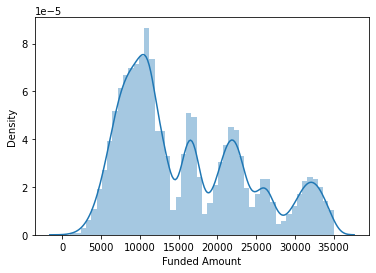

In [20]:
sns.distplot(df['Funded Amount'])

In [ ]:
sns.distplot(df['Funded Amount Investor'])

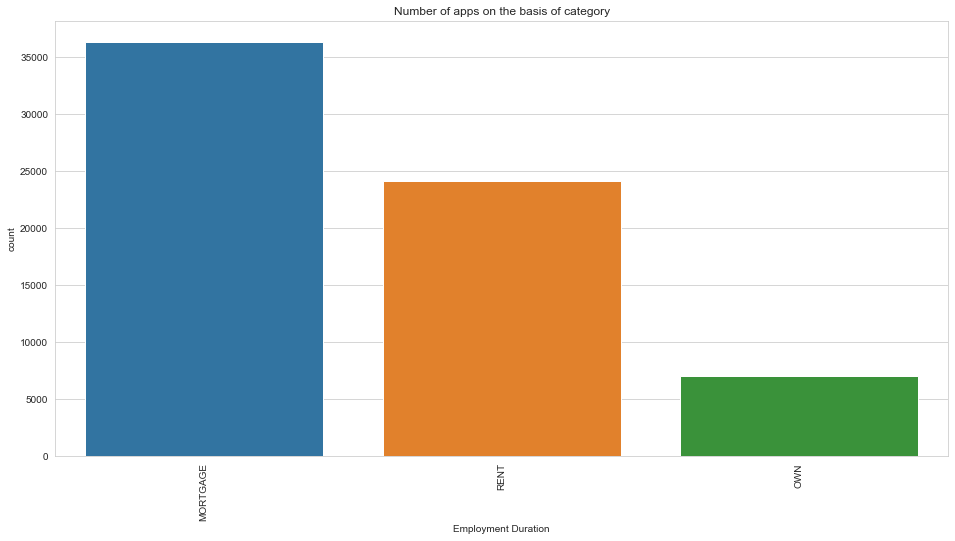

In [28]:
sns.set_style('whitegrid')
plt.figure(figsize=(16,8))
plt.title('Number of apps on the basis of category')
sns.countplot(x='Employment Duration',data = df)
plt.xticks(rotation=90)
plt.show()

<AxesSubplot:xlabel='Funded Amount Investor', ylabel='Count'>

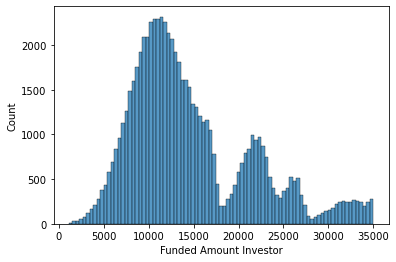

In [23]:
sns.histplot(df['Funded Amount Investor'])

<AxesSubplot:xlabel='Total Collection Amount', ylabel='Count'>

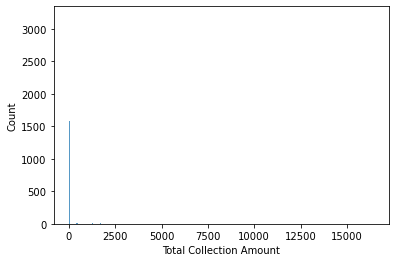

In [25]:
sns.histplot(df['Total Collection Amount'])